 <a name="1"></a>
# <span style="color:green">Задачи исследования:<span>
    
- проанализировать тарифные планы компании
- проанализировать поведение клиентов компании использующие тарифные планы представленные ниже
- сделать вывод — какой тариф приносит больше денег.

### Описание тарифов

##### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов.
    Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

##### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

# План 

## 1. [Осмотр и изучение данных](#1)

## 2. [Предобработка данных](#2)

- исправление ошибок в данных
- проверка и предварительный анализ

## 3. [Подготовка, очистка и добавление данных](#3)

- индексы и названия столбцов
- работа с дубликатами
- работа с пропущенными значениями
- изменение типов данных
- добавление дополнительных метрик **для каждого пользователя:**
      
      
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

## 4. [Исследовательский анализ данных](#4)

- Опишите поведение клиентов оператора, исходя из выборки.
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.(#41)
  
## 5. [Проверка гипотез](#5)

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
  
## 6. [Выводы и результаты исследования](#6)

# 1. Импорт библиотек и чтение данных

In [1053]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10,7
pd.set_option('display.max_columns', None)

In [1054]:
calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')
users = pd.read_csv('datasets/users.csv')

### 1.1 Таблица звонков

In [1055]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [1056]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### 1.2 Таблица интернет трафика

In [1057]:
internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


In [1058]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


### 1.3 Таблица сообщений

In [1059]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [1060]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### 1.3 Таблица пользователей

In [1061]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [1062]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### 1.4 Таблица тарифов

In [1063]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### 1.5 Общая таблица данных

In [1064]:
len(users), len(calls), len(messages), len(internet)

(500, 202607, 123036, 149396)

In [1065]:
all_calls_user = calls.pivot_table(index='user_id', values='duration')
all_calls_user.head()

,duration
user_id,
1000,6.571304
1001,6.552951
1002,6.595253
1003,6.924077
1004,5.234148


In [1066]:
all_internet_user = internet.pivot_table(index='user_id', values='mb_used')
all_internet_user.head()

,mb_used
user_id,
1000,508.968294
1001,338.187500
1002,314.462114
1003,550.775385
1004,496.798267


In [1067]:
all_messages_user = messages.pivot_table(index='user_id', aggfunc='count')
all_messages_user.drop(['id'], axis=1, inplace=True)
all_messages_user.rename({'message_date': 'count_messages'}, axis=1, inplace=True)
all_messages_user.head()

,count_messages
user_id,
1000,496
1002,70
1003,380
1004,1192
1005,552


In [1068]:
df = ( 
        users.merge(all_calls_user, how='outer', on='user_id')
             .merge(all_internet_user, how='outer', on='user_id')
             .merge(all_messages_user, how='outer', on='user_id')
      )

In [1069]:
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,mb_used,count_messages
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.571304,508.968294,496.0
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,6.552951,338.187500,NaN
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.595253,314.462114,70.0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,6.924077,550.775385,380.0
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5.234148,496.798267,1192.0


In [1070]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
user_id           500 non-null int64
age               500 non-null int64
churn_date        38 non-null object
city              500 non-null object
first_name        500 non-null object
last_name         500 non-null object
reg_date          500 non-null object
tariff            500 non-null object
duration          492 non-null float64
mb_used           497 non-null float64
count_messages    426 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 46.9+ KB


 <a name="2"></a>
# 2. Предобработка данных и предварительный анализ
[К оглавлению](#1)

### Распределение пользователей по тарифам

In [1071]:
df['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [1072]:
## дейсвтующих
df[df['churn_date'].isna()]['tariff'].value_counts()

smart    328
ultra    134
Name: tariff, dtype: int64

In [1073]:
## прекративших пользоваться услугами
df[df['churn_date'].isna()]['tariff'].value_counts()

smart    328
ultra    134
Name: tariff, dtype: int64

### Звоники длительностью менее 1 минуты

In [1074]:
calls[calls['duration'] < 1]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202596,1499_209,2018-12-16,0.00,1499


### Вывод:
**Всего в нашей выборке 500 абонентов:**
- тариф smart 351 пользователя
- тариф ultra 149 пользователя

##### из которых действующих 462:

- тариф smart 328
- тариф ultra 134

##### прекративших пользоваться услугами 38**:
- тариф smart 23
- тариф ultra 15

**Предварительный анализ показал что:**

- Требуется изменить в данных тип данных всех дат в datetime
- Столбец **churn_date** можно изменить на True и False - по желанию
- Опереатор всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Значит требуется округлить значения меньше минуты 
- Интернет трафик по тарифу расчитывается в Гб а в таблице Мб. Обратить внимание при обобщении трафика для каждого usera 

<a name="3"></a>
# 3. Подготовка и очистка данных
[К оглавлению](#1)


### Заменяем пропущенные значения

In [1075]:
users['churn_date'].fillna(False, inplace=True)

In [1076]:
def split_charn(value):
    if value:
        return True
    return False

In [1077]:
users['churn_date'] = users['churn_date'].apply(split_charn)
# users['churn_date'].value_counts()

### Изменяем тип данных в таблицах

In [1078]:
def get_datetime(data, columns):
    for col in columns:
        data[col] = data[col].astype('datetime64[ns]')
    return data

In [1079]:
get_datetime(calls, ['call_date'])
get_datetime(internet, ['session_date'])
get_datetime(messages, ['message_date'])
get_datetime(users, ['reg_date'])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,False,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,False,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,False,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,True,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Округлим данные по звонкам и заменим нули на 1

In [1080]:
# Смотрим сколько данных меньше 1 минуты
calls[calls['duration'] < 1]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202596,1499_209,2018-12-16,0.00,1499


In [1081]:
# Приводим значения в порядок
calls['duration'] = calls['duration'].apply(np.ceil).astype('int').replace(0, 1)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


### Округлим данные интерент сессий, заменим нули на 1

In [1082]:
# Смотрим данные по интернет сессиям
internet[internet['mb_used'] < 1]

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


In [1083]:
# Приводим значения в порядок
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int').replace(0, 1)
internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,1,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


## 3.2 Добавление дополнительных метрик для пользователей:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

### 3.2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам

In [1084]:
calls['call_date_month'] = calls['call_date'].dt.month_name()

In [1085]:
calls.head(1)

,id,call_date,duration,user_id,call_date_month
0,1000_0,2018-07-25,1,1000,July


### Варианты группировок для извлечения данных 
- Существует множество вариантов для группировки и создания таблиц, но для дальнейшего обучения моделей лучше выделять признаки в отдельный столбец

In [1086]:
# calls.pivot_table(
#     index=['call_date_month', 'user_id'],
#     values='duration',
#     aggfunc=['count', 'sum'])


In [1087]:
# calls.groupby(['user_id', 'call_date_month'])\
#                   .agg({'duration':'sum', 'id':'count'})\
#                   .reset_index()\
#                   .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [1088]:
## Временный датасет с количеством минут и разбиением по месяцам
calls_count_sum_month = ( 
    
        calls.pivot_table(index='user_id', 
                        columns='call_date_month', 
                        values='duration',
                        aggfunc='count',
                        fill_value = 0)
        .merge(calls.pivot_table(index='user_id', 
                        columns='call_date_month', 
                        values='duration',
                        aggfunc='sum',
                        fill_value = 0), 
                        on='user_id', how='outer', suffixes=('_count_calls', '_sum_calls'))
       )



In [1089]:
#### Временный датасет с количеством минут и разбиением по месяцам + добавлены общие значения
all_calls_month = (         
                        calls.pivot_table(index='user_id', 
                                          values='duration',
                                          aggfunc=['count', 'sum'],
                                          fill_value = 0)
                        .merge(calls_count_sum_month, how='outer', on='user_id')
                        
                      )
all_calls_month['total_count_calls'] = all_calls_month[('count', 'duration')]
all_calls_month['sum_minutes_calls'] = all_calls_month[('sum', 'duration')]
all_calls_month.drop([('count', 'duration'), ('sum', 'duration')], inplace=True, axis=1)
all_calls_month.head()

,April_count_calls,August_count_calls,December_count_calls,February_count_calls,January_count_calls,July_count_calls,June_count_calls,March_count_calls,May_count_calls,November_count_calls,October_count_calls,September_count_calls,April_sum_calls,August_sum_calls,December_sum_calls,February_sum_calls,January_sum_calls,July_sum_calls,June_sum_calls,March_sum_calls,May_sum_calls,November_sum_calls,October_sum_calls,September_sum_calls,total_count_calls,sum_minutes_calls
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0,52,46,0,0,47,43,0,22,43,57,58,0,418,341,0,0,346,187,0,164,344,363,478,368,2641
1001,0,0,63,0,0,0,0,0,0,59,0,0,0,0,430,0,0,0,0,0,0,444,0,0,122,874
1002,0,42,33,0,0,26,15,0,0,32,33,36,0,294,242,0,0,219,118,0,0,250,221,217,217,1561
1003,0,55,108,0,0,0,0,0,0,115,108,134,0,392,822,0,0,0,0,0,0,844,866,990,520,3914
1004,0,19,21,0,0,22,31,0,9,19,29,26,0,138,136,0,0,137,177,0,37,121,153,125,176,1024


### 3.2.2 Количество отправленных сообщений по месяцам

In [1090]:
messages['message_date_month'] = messages['message_date'].dt.month_name()
messages.head(1)

,id,message_date,user_id,message_date_month
0,1000_0,2018-06-27,1000,June


In [1091]:
# Группируем по месяцам количество отправленных сообщений
message_count_month = messages.pivot_table(index='user_id', 
                            columns='message_date_month',
                            values='message_date',
                            aggfunc='count',
                            fill_value = 0)
message_count_month.head()

message_date_month,April,August,December,February,January,July,June,March,May,November,October,September
user_id,,,,,,,,,,,,
1000,0,81,70,0,0,75,60,0,22,58,73,57
1002,0,13,12,0,0,11,4,0,0,16,10,4
1003,0,37,75,0,0,0,0,0,0,94,83,91
1004,0,151,162,0,0,181,134,0,95,158,165,146
1005,41,64,54,38,7,56,47,56,42,51,44,52


In [1092]:
# Группируем общее количество смс пользователя
# мержим временные данные по сообщениям
all_messages_month = (
                     messages.pivot_table(index='user_id', values='message_date', aggfunc='count')
                    .rename(columns={'message_date':'count_message'})
                    .merge(message_count_month, 
                           how='outer', 
                           on='user_id')
)

all_messages_month.head()

,count_message,April,August,December,February,January,July,June,March,May,November,October,September
user_id,,,,,,,,,,,,,
1000,496,0,81,70,0,0,75,60,0,22,58,73,57
1002,70,0,13,12,0,0,11,4,0,0,16,10,4
1003,380,0,37,75,0,0,0,0,0,0,94,83,91
1004,1192,0,151,162,0,0,181,134,0,95,158,165,146
1005,552,41,64,54,38,7,56,47,56,42,51,44,52


### 3.2.3 Объем израсходованного интернет-трафика по месяцам

In [1093]:
internet['session_date_month'] = internet['session_date'].dt.month_name()
internet.head(1)

,id,mb_used,session_date,user_id,session_date_month
0,1000_0,113,2018-11-25,1000,November


In [1094]:
## Группируем трафик пользователя по месяцам
# Группируем общее количество трафика пользователя
traffic_sum_month = (
    
            internet.pivot_table(index='user_id', 
                            columns='session_date_month',
                            values='mb_used',
                            aggfunc='sum',
                            fill_value = 0)
)    
traffic_sum_month.head()

session_date_month,April,August,December,February,January,July,June,March,May,November,October,September
user_id,,,,,,,,,,,,
1000,0,14072,9829,0,0,14017,23262,0,2257,14769,14717,14583
1001,0,0,14059,0,0,0,0,0,0,18460,0,0
1002,0,20357,18147,0,0,17615,10878,0,0,18621,13913,16724
1003,0,8572,10132,0,0,0,0,0,0,11369,14779,12479
1004,0,28609,18041,0,0,22246,17621,0,13415,15634,18498,15130


In [1095]:
# Мержим всю информацию по месяцам по трафику
all_traffic_month =  (
                internet.pivot_table(index='user_id', values='mb_used', aggfunc='sum')
                .rename(columns={'mb_used':'all_used_traffic'})
                .merge(traffic_sum_month, how='outer', on='user_id')
             )   
all_traffic_month.head(5)

,all_used_traffic,April,August,December,February,January,July,June,March,May,November,October,September
user_id,,,,,,,,,,,,,
1000,107506,0,14072,9829,0,0,14017,23262,0,2257,14769,14717,14583
1001,32519,0,0,14059,0,0,0,0,0,0,18460,0,0
1002,116255,0,20357,18147,0,0,17615,10878,0,0,18621,13913,16724
1003,57331,0,8572,10132,0,0,0,0,0,0,11369,14779,12479
1004,149194,0,28609,18041,0,0,22246,17621,0,13415,15634,18498,15130


### Таблица полных данных по месяцам

In [1096]:

full_data =  (
            users.merge(all_calls_month, how='outer', on='user_id')
                .merge(all_messages_month, how='outer', on='user_id')
                .merge(all_traffic_month, how='outer', on='user_id', 
                       suffixes=('_message', '_internet'))

)

full_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,April_count_calls,August_count_calls,December_count_calls,February_count_calls,January_count_calls,July_count_calls,June_count_calls,March_count_calls,May_count_calls,November_count_calls,October_count_calls,September_count_calls,April_sum_calls,August_sum_calls,December_sum_calls,February_sum_calls,January_sum_calls,July_sum_calls,June_sum_calls,March_sum_calls,May_sum_calls,November_sum_calls,October_sum_calls,September_sum_calls,total_count_calls,sum_minutes_calls,count_message,April_message,August_message,December_message,February_message,January_message,July_message,June_message,March_message,May_message,November_message,October_message,September_message,all_used_traffic,April_internet,August_internet,December_internet,February_internet,January_internet,July_internet,June_internet,March_internet,May_internet,November_internet,October_internet,September_internet
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,52.0,46.0,0.0,0.0,47.0,43.0,0.0,22.0,43.0,57.0,58.0,0.0,418.0,341.0,0.0,0.0,346.0,187.0,0.0,164.0,344.0,363.0,478.0,368.0,2641.0,496.0,0.0,81.0,70.0,0.0,0.0,75.0,60.0,0.0,22.0,58.0,73.0,57.0,107506.0,0.0,14072.0,9829.0,0.0,0.0,14017.0,23262.0,0.0,2257.0,14769.0,14717.0,14583.0
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,444.0,0.0,0.0,122.0,874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32519.0,0.0,0.0,14059.0,0.0,0.0,0.0,0.0,0.0,0.0,18460.0,0.0,0.0
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,42.0,33.0,0.0,0.0,26.0,15.0,0.0,0.0,32.0,33.0,36.0,0.0,294.0,242.0,0.0,0.0,219.0,118.0,0.0,0.0,250.0,221.0,217.0,217.0,1561.0,70.0,0.0,13.0,12.0,0.0,0.0,11.0,4.0,0.0,0.0,16.0,10.0,4.0,116255.0,0.0,20357.0,18147.0,0.0,0.0,17615.0,10878.0,0.0,0.0,18621.0,13913.0,16724.0
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra,0.0,55.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,108.0,134.0,0.0,392.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,844.0,866.0,990.0,520.0,3914.0,380.0,0.0,37.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,83.0,91.0,57331.0,0.0,8572.0,10132.0,0.0,0.0,0.0,0.0,0.0,0.0,11369.0,14779.0,12479.0
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,19.0,21.0,0.0,0.0,22.0,31.0,0.0,9.0,19.0,29.0,26.0,0.0,138.0,136.0,0.0,0.0,137.0,177.0,0.0,37.0,121.0,153.0,125.0,176.0,1024.0,1192.0,0.0,151.0,162.0,0.0,0.0,181.0,134.0,0.0,95.0,158.0,165.0,146.0,149194.0,0.0,28609.0,18041.0,0.0,0.0,22246.0,17621.0,0.0,13415.0,15634.0,18498.0,15130.0


### 3.2.4 Помесячная выручка с каждого пользователя

Рабочие таблицы по звонкам, сообщениям и трафику разбитые по признакам(месяцам и общему количеству за все время) - работа будет вестись с каждой таблицей отдельно (как вариант можно работать с таблицей full_data), но возможно потребуется промежуточные результаты, поэтому работаем отдельно.

- all_calls_month
- all_messages_month
- all_traffic_month

- Требуется вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика и остаток умножить на значение из тарифного плана

In [1097]:
# Разобьем пользователей по тарифам
costs_calls = users.merge(all_calls_month, how='outer', on='user_id')
ultra = costs_calls[costs_calls['tariff'] == 'ultra']
smart = costs_calls[costs_calls['tariff'] == 'smart']
smart.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,April_count_calls,August_count_calls,December_count_calls,February_count_calls,January_count_calls,July_count_calls,June_count_calls,March_count_calls,May_count_calls,November_count_calls,October_count_calls,September_count_calls,April_sum_calls,August_sum_calls,December_sum_calls,February_sum_calls,January_sum_calls,July_sum_calls,June_sum_calls,March_sum_calls,May_sum_calls,November_sum_calls,October_sum_calls,September_sum_calls,total_count_calls,sum_minutes_calls
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,444.0,0.0,0.0,122.0,874.0
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,42.0,33.0,0.0,0.0,26.0,15.0,0.0,0.0,32.0,33.0,36.0,0.0,294.0,242.0,0.0,0.0,219.0,118.0,0.0,0.0,250.0,221.0,217.0,217.0,1561.0
5,1005,67,False,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,101.0,71.0,84.0,69.0,15.0,77.0,80.0,77.0,73.0,75.0,100.0,66.0,736.0,626.0,613.0,470.0,99.0,584.0,623.0,620.0,606.0,562.0,745.0,488.0,888.0,6772.0
6,1006,21,False,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,47.0,42.0,50.0,3.0,0.0,49.0,53.0,46.0,56.0,62.0,44.0,54.0,365.0,285.0,385.0,42.0,0.0,327.0,483.0,296.0,381.0,388.0,276.0,367.0,506.0,3595.0
7,1007,65,False,Москва,Юна,Березина,2018-04-19,smart,25.0,74.0,72.0,0.0,0.0,69.0,68.0,0.0,67.0,81.0,69.0,87.0,202.0,483.0,439.0,0.0,0.0,589.0,558.0,0.0,490.0,594.0,481.0,674.0,612.0,4510.0


In [1098]:
len(ultra), len(smart)

(149, 351)

In [1099]:
ultra.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'April_count_calls', 'August_count_calls',
       'December_count_calls', 'February_count_calls', 'January_count_calls',
       'July_count_calls', 'June_count_calls', 'March_count_calls',
       'May_count_calls', 'November_count_calls', 'October_count_calls',
       'September_count_calls', 'April_sum_calls', 'August_sum_calls',
       'December_sum_calls', 'February_sum_calls', 'January_sum_calls',
       'July_sum_calls', 'June_sum_calls', 'March_sum_calls', 'May_sum_calls',
       'November_sum_calls', 'October_sum_calls', 'September_sum_calls',
       'total_count_calls', 'sum_minutes_calls'],
      dtype='object')

### Стоимость звонков абонентов тарифа "Смарт"

In [1100]:
def profit_calls_smart(row):
    """
    Функция возвращает выручку по месяцам
    """
    row['minutes_included'] = 500
    for col in all_calls_month.columns.tolist():
        if 'sum_calls' in col:
            if row[col] > 500:
                minutes = row[col] - 500
                # минуты сверх лимита
                row[col + '_over_limit'] = minutes
                # стоимость месяца по тарифу + 3 рубля минута
                new_col = col.split('_')[0]
                row[new_col + '_cost_calls'] = minutes * 3
            else:
                new_col = col.split('_')[0]
                row[new_col + '_cost_calls'] = 0
    return row

In [1101]:
# Считаем стоимость звонков абонентов
smart_cost_calls = smart.apply(profit_calls_smart, axis=1)

In [1102]:
smart_cost_calls.head()

,April_cost_calls,April_count_calls,April_sum_calls,April_sum_calls_over_limit,August_cost_calls,August_count_calls,August_sum_calls,August_sum_calls_over_limit,December_cost_calls,December_count_calls,December_sum_calls,December_sum_calls_over_limit,February_cost_calls,February_count_calls,February_sum_calls,February_sum_calls_over_limit,January_cost_calls,January_count_calls,January_sum_calls,January_sum_calls_over_limit,July_cost_calls,July_count_calls,July_sum_calls,July_sum_calls_over_limit,June_cost_calls,June_count_calls,June_sum_calls,June_sum_calls_over_limit,March_cost_calls,March_count_calls,March_sum_calls,March_sum_calls_over_limit,May_cost_calls,May_count_calls,May_sum_calls,May_sum_calls_over_limit,November_cost_calls,November_count_calls,November_sum_calls,November_sum_calls_over_limit,October_cost_calls,October_count_calls,October_sum_calls,October_sum_calls_over_limit,September_cost_calls,September_count_calls,September_sum_calls,September_sum_calls_over_limit,age,churn_date,city,first_name,last_name,minutes_included,reg_date,sum_minutes_calls,tariff,total_count_calls,user_id
1,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,63.0,430.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,59.0,444.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,41,False,Москва,Иван,Ежов,500,2018-11-01,874.0,smart,122.0,1001
2,0.0,0.0,0.0,NaN,0.0,42.0,294.0,NaN,0.0,33.0,242.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.0,219.0,NaN,0.0,15.0,118.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,32.0,250.0,NaN,0.0,33.0,221.0,NaN,0.0,36.0,217.0,NaN,59,False,Стерлитамак,Евгений,Абрамович,500,2018-06-17,1561.0,smart,217.0,1002
5,708.0,101.0,736.0,236.0,378.0,71.0,626.0,126.0,339.0,84.0,613.0,113.0,0.0,69.0,470.0,NaN,0.0,15.0,99.0,NaN,252.0,77.0,584.0,84.0,369.0,80.0,623.0,123.0,360.0,77.0,620.0,120.0,318.0,73.0,606.0,106.0,186.0,75.0,562.0,62.0,735.0,100.0,745.0,245.0,0.0,66.0,488.0,NaN,67,False,Набережные Челны,Афанасий,Горлов,500,2018-01-25,6772.0,smart,888.0,1005
6,0.0,47.0,365.0,NaN,0.0,42.0,285.0,NaN,0.0,50.0,385.0,NaN,0.0,3.0,42.0,NaN,0.0,0.0,0.0,NaN,0.0,49.0,327.0,NaN,0.0,53.0,483.0,NaN,0.0,46.0,296.0,NaN,0.0,56.0,381.0,NaN,0.0,62.0,388.0,NaN,0.0,44.0,276.0,NaN,0.0,54.0,367.0,NaN,21,False,Ульяновск,Леонид,Ермолаев,500,2018-02-26,3595.0,smart,506.0,1006
7,0.0,25.0,202.0,NaN,0.0,74.0,483.0,NaN,0.0,72.0,439.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,267.0,69.0,589.0,89.0,174.0,68.0,558.0,58.0,0.0,0.0,0.0,NaN,0.0,67.0,490.0,NaN,282.0,81.0,594.0,94.0,0.0,69.0,481.0,NaN,522.0,87.0,674.0,174.0,65,False,Москва,Юна,Березина,500,2018-04-19,4510.0,smart,612.0,1007


### Стоимость звонков абонентов тарифа "Ультра"

In [1103]:
def profit_calls_ultra(row):
    """
    Функция возвращает выручку по месяцам
    """
    row['minutes_included'] = 3000
    for col in all_calls_month.columns.tolist():
        if 'sum_calls' in col:
            if row[col] > 3000:
                minutes = row[col] - 3000
                # минуты сверх лимита
                row[col + '_over_limit'] = minutes
                # стоимость месяца по тарифу + 1 рубль минута
                new_col = col.split('_')[0]
                row[new_col + '_cost_calls'] = minutes
            else:
                row[col + '_over_limit'] = 0
                new_col = col.split('_')[0]
                row[new_col + '_cost_calls'] = 0
    return row

In [1104]:
ultra_cost_calls = ultra.apply(profit_calls_ultra, axis=1)

In [1105]:
ultra_cost_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,April_count_calls,August_count_calls,December_count_calls,February_count_calls,January_count_calls,July_count_calls,June_count_calls,March_count_calls,May_count_calls,November_count_calls,October_count_calls,September_count_calls,April_sum_calls,August_sum_calls,December_sum_calls,February_sum_calls,January_sum_calls,July_sum_calls,June_sum_calls,March_sum_calls,May_sum_calls,November_sum_calls,October_sum_calls,September_sum_calls,total_count_calls,sum_minutes_calls,minutes_included,April_sum_calls_over_limit,April_cost_calls,August_sum_calls_over_limit,August_cost_calls,December_sum_calls_over_limit,December_cost_calls,February_sum_calls_over_limit,February_cost_calls,January_sum_calls_over_limit,January_cost_calls,July_sum_calls_over_limit,July_cost_calls,June_sum_calls_over_limit,June_cost_calls,March_sum_calls_over_limit,March_cost_calls,May_sum_calls_over_limit,May_cost_calls,November_sum_calls_over_limit,November_cost_calls,October_sum_calls_over_limit,October_cost_calls,September_sum_calls_over_limit,September_cost_calls
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,52.0,46.0,0.0,0.0,47.0,43.0,0.0,22.0,43.0,57.0,58.0,0.0,418.0,341.0,0.0,0.0,346.0,187.0,0.0,164.0,344.0,363.0,478.0,368.0,2641.0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra,0.0,55.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,108.0,134.0,0.0,392.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,844.0,866.0,990.0,520.0,3914.0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,19.0,21.0,0.0,0.0,22.0,31.0,0.0,9.0,19.0,29.0,26.0,0.0,138.0,136.0,0.0,0.0,137.0,177.0,0.0,37.0,121.0,153.0,125.0,176.0,1024.0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1013,36,False,Иваново,Борис,Андреенко,2018-11-14,ultra,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,142.0,972.0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,1016,58,False,Омск,Марица,Сазонова,2018-11-21,ultra,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,20.0,128.0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Стоимость сообщений абонентов тарифа "Смарт"

In [1106]:
# Разобьем пользователей по тарифам
costs_messages = users.merge(all_messages_month, how='outer', on='user_id')
ultra = costs_messages[costs_messages['tariff'] == 'ultra']
smart = costs_messages[costs_messages['tariff'] == 'smart']
smart.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_message,April,August,December,February,January,July,June,March,May,November,October,September
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,70.0,0.0,13.0,12.0,0.0,0.0,11.0,4.0,0.0,0.0,16.0,10.0,4.0
5,1005,67,False,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,552.0,41.0,64.0,54.0,38.0,7.0,56.0,47.0,56.0,42.0,51.0,44.0,52.0
6,1006,21,False,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1007,65,False,Москва,Юна,Березина,2018-04-19,smart,225.0,11.0,27.0,26.0,0.0,0.0,26.0,26.0,0.0,39.0,21.0,18.0,31.0


In [1107]:
# smart.columns.tolist()
list_month = ['April',
             'August',
             'December',
             'February',
             'January',
             'July',
             'June',
             'March',
             'May',
             'November',
             'October',
             'September']

In [1108]:
def profit_messages_smart(row):
    """
    Функция возвращает выручку по месяцам за сообщения тариф + сверх лимит
    """
    row['messages_included'] = 50
    for col in list_month:
        if col in smart.columns.tolist():
            if row[col] > 50:
                count_messages = row[col] - 50
                # сообщения сверх лимита
                row[col + '_msg_over_limit'] = count_messages
                # стоимость месяца по тарифу + 3 рубля сообщение
                row[col + '_cost_messages'] = count_messages * 3
            else:
                row[col + '_cost_messages'] = 0
    return row

In [1109]:
# Считаем стоимость сообщений абонентов
smart_cost_messages = ultra.apply(profit_messages_smart, axis=1)

In [1110]:
smart_cost_messages.head()

,April,April_cost_messages,April_msg_over_limit,August,August_cost_messages,August_msg_over_limit,December,December_cost_messages,December_msg_over_limit,February,February_cost_messages,February_msg_over_limit,January,January_cost_messages,January_msg_over_limit,July,July_cost_messages,July_msg_over_limit,June,June_cost_messages,June_msg_over_limit,March,March_cost_messages,March_msg_over_limit,May,May_cost_messages,May_msg_over_limit,November,November_cost_messages,November_msg_over_limit,October,October_cost_messages,October_msg_over_limit,September,September_cost_messages,September_msg_over_limit,age,churn_date,city,count_message,first_name,last_name,messages_included,reg_date,tariff,user_id
0,0.0,0.0,NaN,81.0,93.0,31.0,70.0,60.0,20.0,0.0,0.0,NaN,0.0,0.0,NaN,75.0,75.0,25.0,60.0,30.0,10.0,0.0,0.0,NaN,22.0,0.0,NaN,58.0,24.0,8.0,73.0,69.0,23.0,57.0,21.0,7.0,52,False,Краснодар,496.0,Рафаил,Верещагин,50,2018-05-25,ultra,1000
3,0.0,0.0,NaN,37.0,0.0,NaN,75.0,75.0,25.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,94.0,132.0,44.0,83.0,99.0,33.0,91.0,123.0,41.0,23,False,Москва,380.0,Белла,Белякова,50,2018-08-17,ultra,1003
4,0.0,0.0,NaN,151.0,303.0,101.0,162.0,336.0,112.0,0.0,0.0,NaN,0.0,0.0,NaN,181.0,393.0,131.0,134.0,252.0,84.0,0.0,0.0,NaN,95.0,135.0,45.0,158.0,324.0,108.0,165.0,345.0,115.0,146.0,288.0,96.0,68,False,Новокузнецк,1192.0,Татьяна,Авдеенко,50,2018-05-14,ultra,1004
13,0.0,0.0,NaN,0.0,0.0,NaN,25.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,17.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,36,False,Иваново,42.0,Борис,Андреенко,50,2018-11-14,ultra,1013
16,0.0,0.0,NaN,0.0,0.0,NaN,103.0,159.0,53.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,39.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,58,False,Омск,142.0,Марица,Сазонова,50,2018-11-21,ultra,1016


### Стоимость сообщений абонентов тарифа "Ультра"

In [1111]:
def profit_messages_ultra(row):
    """
    Функция возвращает выручку по месяцам за сообщения тариф + сверх лимит
    """
    row['messages_included'] = 1000
    for col in list_month:
        if col in ultra.columns.tolist():
            if row[col] > 1000:
                count_messages = row[col] - 1000
                # сообщения сверх лимита
                row[col + '_msg_over_limit'] = count_messages
                # стоимость месяца по тарифу + 1 рублю сообщение
                row[col + '_cost_messages'] = count_messages
            else:
                row[col + '_msg_over_limit'] = 0
                row[col + '_cost_messages'] = 0
                
    return row

In [1112]:
ultra_cost_messages = smart.apply(profit_messages_ultra, axis=1)

In [1113]:
ultra_cost_messages.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_message,April,August,December,February,January,July,June,March,May,November,October,September,messages_included,April_msg_over_limit,April_cost_messages,August_msg_over_limit,August_cost_messages,December_msg_over_limit,December_cost_messages,February_msg_over_limit,February_cost_messages,January_msg_over_limit,January_cost_messages,July_msg_over_limit,July_cost_messages,June_msg_over_limit,June_cost_messages,March_msg_over_limit,March_cost_messages,May_msg_over_limit,May_cost_messages,November_msg_over_limit,November_cost_messages,October_msg_over_limit,October_cost_messages,September_msg_over_limit,September_cost_messages
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,70.0,0.0,13.0,12.0,0.0,0.0,11.0,4.0,0.0,0.0,16.0,10.0,4.0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1005,67,False,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,552.0,41.0,64.0,54.0,38.0,7.0,56.0,47.0,56.0,42.0,51.0,44.0,52.0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1006,21,False,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1007,65,False,Москва,Юна,Березина,2018-04-19,smart,225.0,11.0,27.0,26.0,0.0,0.0,26.0,26.0,0.0,39.0,21.0,18.0,31.0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Стоимость интернет трафика абонентов тарифа "Смарт"

In [1114]:
# Разобьем пользователей по тарифам
costs_traffic = users.merge(all_traffic_month, how='outer', on='user_id')
ultra = costs_traffic[costs_traffic['tariff'] == 'ultra']
smart = costs_traffic[costs_traffic['tariff'] == 'smart']
smart.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,all_used_traffic,April,August,December,February,January,July,June,March,May,November,October,September
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,32519.0,0.0,0.0,14059.0,0.0,0.0,0.0,0.0,0.0,0.0,18460.0,0.0,0.0
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,116255.0,0.0,20357.0,18147.0,0.0,0.0,17615.0,10878.0,0.0,0.0,18621.0,13913.0,16724.0
5,1005,67,False,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,99851.0,9371.0,7558.0,8685.0,7396.0,2730.0,7705.0,9879.0,11120.0,7882.0,12684.0,7811.0,7030.0
6,1006,21,False,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,164495.0,13963.0,19335.0,18508.0,1399.0,0.0,20008.0,12399.0,17318.0,12992.0,13284.0,19735.0,15554.0
7,1007,65,False,Москва,Юна,Березина,2018-04-19,smart,131876.0,8034.0,20729.0,12526.0,0.0,0.0,15692.0,13681.0,0.0,17721.0,16402.0,14451.0,12640.0


In [1115]:
def profit_traffic_smart(row):
    """
    Функция возвращает выручку по месяцам за сообщения тариф + сверх лимит
    """
    row['mb_month_included'] = 30720
    for col in list_month:
        if col in smart.columns.tolist():
            if row[col] > 1024*15:
                traffic = row[col] - 1024*15
                # трафик сверх лимита
                row[col + '_traffic_over_limit'] = traffic
                # трафик 15 Гб по тарифу + 200 руб Гб
                row[col + '_cost_traffic'] = np.ceil(traffic/1024) * 200
            else:
                row[col + '_cost_traffic'] = 0
    return row

In [1116]:
smart_cost_traffic = smart.apply(profit_traffic_smart, axis=1)

In [1117]:
smart_cost_traffic.head()

,April,April_cost_traffic,April_traffic_over_limit,August,August_cost_traffic,August_traffic_over_limit,December,December_cost_traffic,December_traffic_over_limit,February,February_cost_traffic,February_traffic_over_limit,January,January_cost_traffic,January_traffic_over_limit,July,July_cost_traffic,July_traffic_over_limit,June,June_cost_traffic,June_traffic_over_limit,March,March_cost_traffic,March_traffic_over_limit,May,May_cost_traffic,May_traffic_over_limit,November,November_cost_traffic,November_traffic_over_limit,October,October_cost_traffic,October_traffic_over_limit,September,September_cost_traffic,September_traffic_over_limit,age,all_used_traffic,churn_date,city,first_name,last_name,mb_month_included,reg_date,tariff,user_id
1,0.0,0.0,NaN,0.0,0.0,NaN,14059.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,18460.0,800.0,3100.0,0.0,0.0,NaN,0.0,0.0,NaN,41,32519.0,False,Москва,Иван,Ежов,30720,2018-11-01,smart,1001
2,0.0,0.0,NaN,20357.0,1000.0,4997.0,18147.0,600.0,2787.0,0.0,0.0,NaN,0.0,0.0,NaN,17615.0,600.0,2255.0,10878.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,18621.0,800.0,3261.0,13913.0,0.0,NaN,16724.0,400.0,1364.0,59,116255.0,False,Стерлитамак,Евгений,Абрамович,30720,2018-06-17,smart,1002
5,9371.0,0.0,NaN,7558.0,0.0,NaN,8685.0,0.0,NaN,7396.0,0.0,NaN,2730.0,0.0,NaN,7705.0,0.0,NaN,9879.0,0.0,NaN,11120.0,0.0,NaN,7882.0,0.0,NaN,12684.0,0.0,NaN,7811.0,0.0,NaN,7030.0,0.0,NaN,67,99851.0,False,Набережные Челны,Афанасий,Горлов,30720,2018-01-25,smart,1005
6,13963.0,0.0,NaN,19335.0,800.0,3975.0,18508.0,800.0,3148.0,1399.0,0.0,NaN,0.0,0.0,NaN,20008.0,1000.0,4648.0,12399.0,0.0,NaN,17318.0,400.0,1958.0,12992.0,0.0,NaN,13284.0,0.0,NaN,19735.0,1000.0,4375.0,15554.0,200.0,194.0,21,164495.0,False,Ульяновск,Леонид,Ермолаев,30720,2018-02-26,smart,1006
7,8034.0,0.0,NaN,20729.0,1200.0,5369.0,12526.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,15692.0,200.0,332.0,13681.0,0.0,NaN,0.0,0.0,NaN,17721.0,600.0,2361.0,16402.0,400.0,1042.0,14451.0,0.0,NaN,12640.0,0.0,NaN,65,131876.0,False,Москва,Юна,Березина,30720,2018-04-19,smart,1007


### Стоимость интернет трафика абонентов тарифа "Ультра"

In [1118]:
def profit_traffic_ultra(row):
    """
    Функция возвращает выручку по месяцам за сообщения тариф + сверх лимит
    """
    row['mb_month_included'] = 15360
    for col in list_month:
        if col in smart.columns.tolist():
            if row[col] > 1024*30:
                traffic = row[col] - 1024*30
                # трафик сверх лимита
                row[col + '_traffic_over_limit'] = traffic
                # трафик 30 Гб по тарифу + 150 руб Гб      
                row[col + '_cost_traffic'] = np.ceil(traffic/1024) * 150
            else:
                row[col + '_cost_traffic'] = 0
    return row

In [1119]:
ultra_cost_traffic = ultra.apply(profit_traffic_ultra, axis=1)

In [1120]:
ultra_cost_traffic.head()

,April,April_cost_traffic,April_traffic_over_limit,August,August_cost_traffic,August_traffic_over_limit,December,December_cost_traffic,December_traffic_over_limit,February,February_cost_traffic,February_traffic_over_limit,January,January_cost_traffic,July,July_cost_traffic,July_traffic_over_limit,June,June_cost_traffic,June_traffic_over_limit,March,March_cost_traffic,March_traffic_over_limit,May,May_cost_traffic,May_traffic_over_limit,November,November_cost_traffic,November_traffic_over_limit,October,October_cost_traffic,October_traffic_over_limit,September,September_cost_traffic,September_traffic_over_limit,age,all_used_traffic,churn_date,city,first_name,last_name,mb_month_included,reg_date,tariff,user_id
0,0.0,0.0,NaN,14072.0,0.0,NaN,9829.0,0.0,NaN,0.0,0.0,NaN,0.0,0,14017.0,0.0,NaN,23262.0,0.0,NaN,0.0,0.0,NaN,2257.0,0.0,NaN,14769.0,0.0,NaN,14717.0,0.0,NaN,14583.0,0.0,NaN,52,107506.0,False,Краснодар,Рафаил,Верещагин,15360,2018-05-25,ultra,1000
3,0.0,0.0,NaN,8572.0,0.0,NaN,10132.0,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,11369.0,0.0,NaN,14779.0,0.0,NaN,12479.0,0.0,NaN,23,57331.0,False,Москва,Белла,Белякова,15360,2018-08-17,ultra,1003
4,0.0,0.0,NaN,28609.0,0.0,NaN,18041.0,0.0,NaN,0.0,0.0,NaN,0.0,0,22246.0,0.0,NaN,17621.0,0.0,NaN,0.0,0.0,NaN,13415.0,0.0,NaN,15634.0,0.0,NaN,18498.0,0.0,NaN,15130.0,0.0,NaN,68,149194.0,False,Новокузнецк,Татьяна,Авдеенко,15360,2018-05-14,ultra,1004
13,0.0,0.0,NaN,0.0,0.0,NaN,20757.0,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,9794.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,36,30551.0,False,Иваново,Борис,Андреенко,15360,2018-11-14,ultra,1013
16,0.0,0.0,NaN,0.0,0.0,NaN,19447.0,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,7388.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,58,26835.0,False,Омск,Марица,Сазонова,15360,2018-11-21,ultra,1016


### Получили таблицы с данными по абонентам

- smart_cost_calls
- ultra_cost_calls

- smart_cost_messages
- ultra_cost_messages

- smart_cost_traffic
- ultra_cost_traffic

##### Удалим лишние повторющиеся данные, которые мы добавляли чтобы разбить  по тарифам
##### Произведем конкатенацию 

In [1121]:
### Удаляем лишнее
def delete_column(df):
    df.drop(['age','churn_date','city','first_name',
                  'last_name','reg_date','tariff'], axis=1, inplace=True)
    return df.fillna(0, inplace=True)

In [1122]:
delete_column(smart_cost_calls)
delete_column(ultra_cost_calls)
delete_column(smart_cost_messages)
delete_column(ultra_cost_messages)
delete_column(smart_cost_traffic)
delete_column(ultra_cost_traffic)

### Соединяем таблицы

In [1123]:
cost_calls = pd.concat([smart_cost_calls, ultra_cost_calls])
cost_messages = pd.concat([smart_cost_messages, ultra_cost_messages])
cost_traffic = pd.concat([smart_cost_traffic, ultra_cost_traffic])

In [1124]:
cost_calls.shape, cost_messages.shape, cost_traffic.shape

((500, 52), (500, 39), (500, 39))

In [1125]:
### Добавляем общую сумму затраченных денег по всем месяцам

In [1126]:
def sum_cost_calls(row):
    row['total_cost_calls'] = 0
    for col in cost_calls.columns.tolist():
        if 'cost_calls' in col:
            row['total_cost_calls'] += row[col]
    return row       
    

In [1127]:
cost_calls = cost_calls.apply(sum_cost_calls, axis=1)

In [1128]:
def sum_cost_messages(row):
    row['total_cost_messages'] = 0
    for col in cost_messages.columns.tolist():
        if 'cost_messages' in col:
            row['total_cost_messages'] += row[col]
    return row  

In [1129]:
cost_messages = cost_messages.apply(sum_cost_messages, axis=1)


In [1130]:
def sum_cost_traffic(row):
    row['total_cost_traffic'] = 0
    for col in cost_traffic.columns.tolist():
        if 'cost_traffic' in col:
            row['total_cost_traffic'] += row[col]
    return row 

In [1131]:
cost_traffic = cost_traffic.apply(sum_cost_traffic, axis=1)

## Получили все данные в одной таблице

In [1151]:
def get_rub_month(row):
    if row['tariff'] == 'ultra':
        row['rub_monthly_fee'] = 1950
        return row
    else:
        row['rub_monthly_fee'] = 550
        return row


In [1152]:
users = users.apply(get_rub_month, axis=1)

In [1153]:
data = users.merge(cost_calls, on='user_id', how='outer')
msg_and_trf = cost_messages.merge(cost_traffic, 
                                   on='user_id', 
                                   how='outer', 
                                   suffixes=('_messages', '_internet'))
data = data.merge(msg_and_trf, on='user_id', how='outer')
data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,rub_monthly_fee,April_cost_calls,April_count_calls,April_sum_calls,April_sum_calls_over_limit,August_cost_calls,August_count_calls,August_sum_calls,August_sum_calls_over_limit,December_cost_calls,December_count_calls,December_sum_calls,December_sum_calls_over_limit,February_cost_calls,February_count_calls,February_sum_calls,February_sum_calls_over_limit,January_cost_calls,January_count_calls,January_sum_calls,January_sum_calls_over_limit,July_cost_calls,July_count_calls,July_sum_calls,July_sum_calls_over_limit,June_cost_calls,June_count_calls,June_sum_calls,June_sum_calls_over_limit,March_cost_calls,March_count_calls,March_sum_calls,March_sum_calls_over_limit,May_cost_calls,May_count_calls,May_sum_calls,May_sum_calls_over_limit,November_cost_calls,November_count_calls,November_sum_calls,November_sum_calls_over_limit,October_cost_calls,October_count_calls,October_sum_calls,October_sum_calls_over_limit,September_cost_calls,September_count_calls,September_sum_calls,September_sum_calls_over_limit,minutes_included,sum_minutes_calls,total_count_calls,total_cost_calls,April_messages,April_cost_messages,April_msg_over_limit,August_messages,August_cost_messages,August_msg_over_limit,December_messages,December_cost_messages,December_msg_over_limit,February_messages,February_cost_messages,February_msg_over_limit,January_messages,January_cost_messages,January_msg_over_limit,July_messages,July_cost_messages,July_msg_over_limit,June_messages,June_cost_messages,June_msg_over_limit,March_messages,March_cost_messages,March_msg_over_limit,May_messages,May_cost_messages,May_msg_over_limit,November_messages,November_cost_messages,November_msg_over_limit,October_messages,October_cost_messages,October_msg_over_limit,September_messages,September_cost_messages,September_msg_over_limit,count_message,messages_included,total_cost_messages,April_internet,April_cost_traffic,April_traffic_over_limit,August_internet,August_cost_traffic,August_traffic_over_limit,December_internet,December_cost_traffic,December_traffic_over_limit,February_internet,February_cost_traffic,February_traffic_over_limit,January_internet,January_cost_traffic,January_traffic_over_limit,July_internet,July_cost_traffic,July_traffic_over_limit,June_internet,June_cost_traffic,June_traffic_over_limit,March_internet,March_cost_traffic,March_traffic_over_limit,May_internet,May_cost_traffic,May_traffic_over_limit,November_internet,November_cost_traffic,November_traffic_over_limit,October_internet,October_cost_traffic,October_traffic_over_limit,September_internet,September_cost_traffic,September_traffic_over_limit,all_used_traffic,mb_month_included,total_cost_traffic
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,0.0,0.0,52.0,418.0,0.0,0.0,46.0,341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,346.0,0.0,0.0,43.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,164.0,0.0,0.0,43.0,344.0,0.0,0.0,57.0,363.0,0.0,0.0,58.0,478.0,0.0,3000.0,2641.0,368.0,0.0,0.0,0.0,0.0,81.0,93.0,31.0,70.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,25.0,60.0,30.0,10.0,0.0,0.0,0.0,22.0,0.0,0.0,58.0,24.0,8.0,73.0,69.0,23.0,57.0,21.0,7.0,496.0,50.0,372.0,0.0,0.0,0.0,14072.0,0.0,0.0,9829.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14017.0,0.0,0.0,23262.0,0.0,0.0,0.0,0.0,0.0,2257.0,0.0,0.0,14769.0,0.0,0.0,14717.0,0.0,0.0,14583.0,0.0,0.0,107506.0,15360.0,0.0
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,874.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18460.0,800.0,3100.0,0.0,0.0,0.0,0.0,0.0,0.0,32519.0,30720.0

### Отбираем нужные столбцы для дальнейшей статистической оценки
- таблица собрана к ней всегда можно обратиться за недостающими данными
- сборка через столбцы позволит в дальнейшем использовать данные для построения моделей. 

In [1154]:
# data.columns.tolist()
list_columns = [
    'user_id',
    'age',
    'churn_date',
    'city',
    'first_name',
    'last_name',
    'reg_date',
    'tariff',
    'rub_monthly_fee',
    'total_count_calls',
    'total_cost_calls',
    'count_message',
    'minutes_included',
    'sum_minutes_calls',
    'total_cost_messages',
    'total_cost_traffic',
    'all_used_traffic',
    'mb_month_included',    
    ]

In [1155]:
df = data[list_columns]
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,rub_monthly_fee,total_count_calls,total_cost_calls,count_message,minutes_included,sum_minutes_calls,total_cost_messages,total_cost_traffic,all_used_traffic,mb_month_included
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,368.0,0.0,496.0,3000.0,2641.0,372.0,0.0,107506.0,15360.0
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,550,122.0,0.0,0.0,500.0,874.0,0.0,800.0,32519.0,30720.0
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550,217.0,0.0,70.0,500.0,1561.0,0.0,3400.0,116255.0,30720.0
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra,1950,520.0,0.0,380.0,3000.0,3914.0,429.0,0.0,57331.0,15360.0
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1950,176.0,0.0,1192.0,3000.0,1024.0,2376.0,0.0,149194.0,15360.0


<a name="4"></a>
# 4. Исследовательский анализ данных

[К оглавлению](#1)

- Опишите поведение клиентов оператора, исходя из выборки.
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


- df - выборка
- data - полные данные

### Распределение пользователей

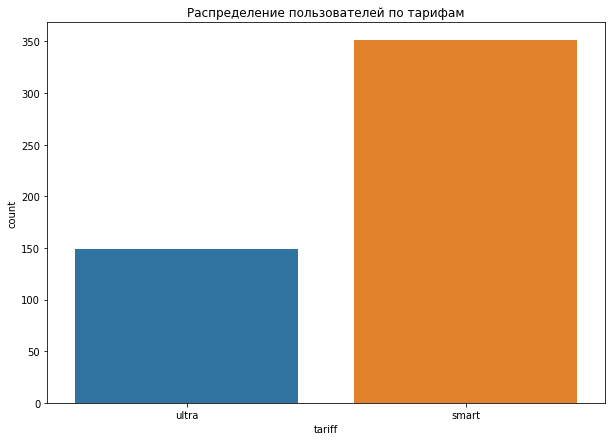

In [1174]:
sns.countplot(df['tariff'])
plt.title('Распределение пользователей по тарифам');

### Годовые затраты

In [1183]:
# Сложим все затраты пользователей за год
df['total_paid'] = (df['total_cost_calls'] + 
                    df['total_cost_messages'] +
                    df['total_cost_traffic'] +
                    df['rub_monthly_fee'] * 12 )

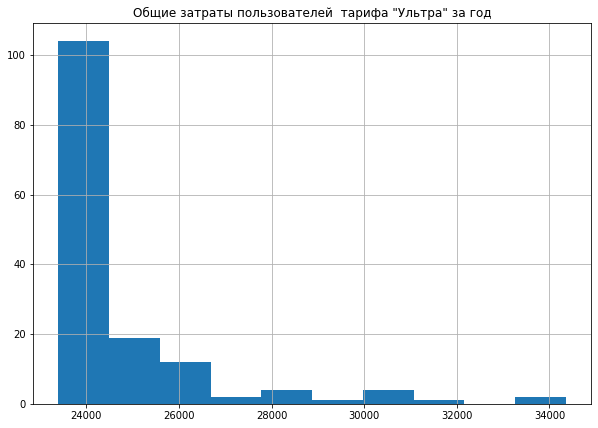

In [1185]:
df[df['tariff'] == 'ultra']['total_paid'].hist()
plt.title('Общие затраты пользователей  тарифа "Ультра" за год');

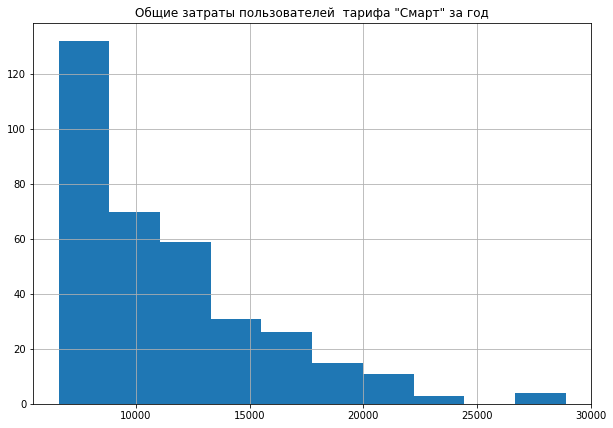

In [1186]:
df[df['tariff'] == 'smart']['total_paid'].hist()
plt.title('Общие затраты пользователей  тарифа "Смарт" за год');

In [1193]:
list_month_calls = data.columns.tolist()
list_month_calls

['user_id',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff',
 'rub_monthly_fee',
 'April_cost_calls',
 'April_count_calls',
 'April_sum_calls',
 'April_sum_calls_over_limit',
 'August_cost_calls',
 'August_count_calls',
 'August_sum_calls',
 'August_sum_calls_over_limit',
 'December_cost_calls',
 'December_count_calls',
 'December_sum_calls',
 'December_sum_calls_over_limit',
 'February_cost_calls',
 'February_count_calls',
 'February_sum_calls',
 'February_sum_calls_over_limit',
 'January_cost_calls',
 'January_count_calls',
 'January_sum_calls',
 'January_sum_calls_over_limit',
 'July_cost_calls',
 'July_count_calls',
 'July_sum_calls',
 'July_sum_calls_over_limit',
 'June_cost_calls',
 'June_count_calls',
 'June_sum_calls',
 'June_sum_calls_over_limit',
 'March_cost_calls',
 'March_count_calls',
 'March_sum_calls',
 'March_sum_calls_over_limit',
 'May_cost_calls',
 'May_count_calls',
 'May_sum_calls',
 'May_sum_calls_over_limit',
 'November_cost_c

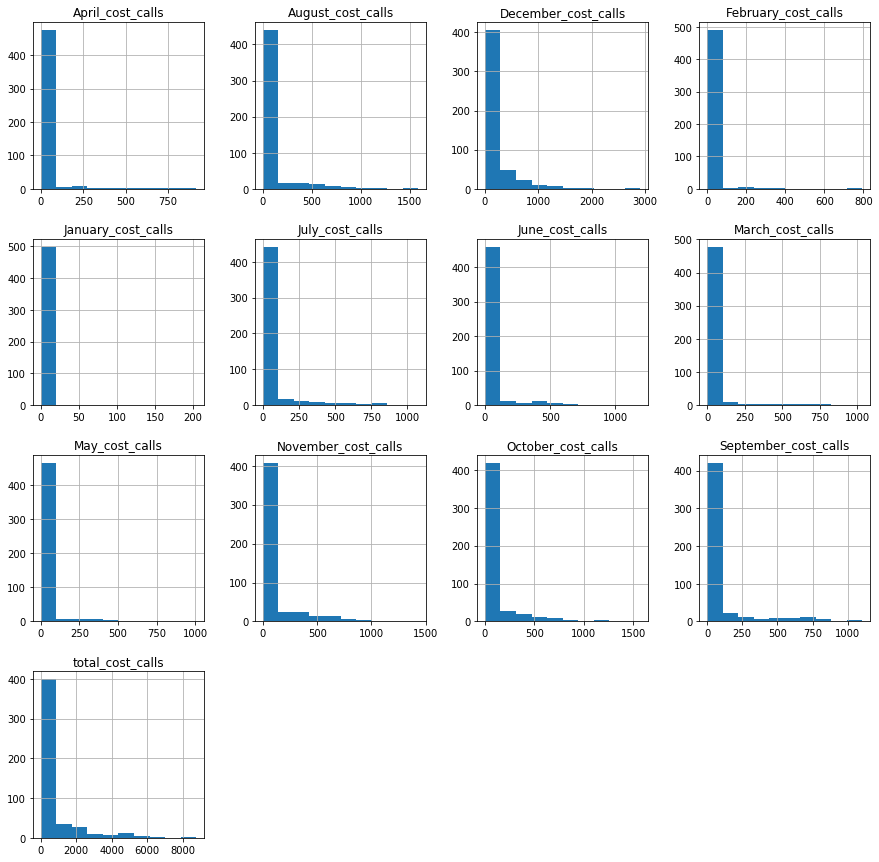

In [1202]:
data[month].hist(figsize=(15, 15));